In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [129]:
df_icecream = pd.read_csv('ice_cream.csv')
df_icecream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [130]:
df_icecream.rename(columns = {'DATE': 'date', 'IPN31152N': 'production'}, inplace=True)
df_icecream['date'] = pd.to_datetime(df_icecream.date)
df_icecream.set_index('date', inplace=True)
start_date = pd.to_datetime('2010-01-01')
df_icecream = df_icecream[start_date: ]
df_icecream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


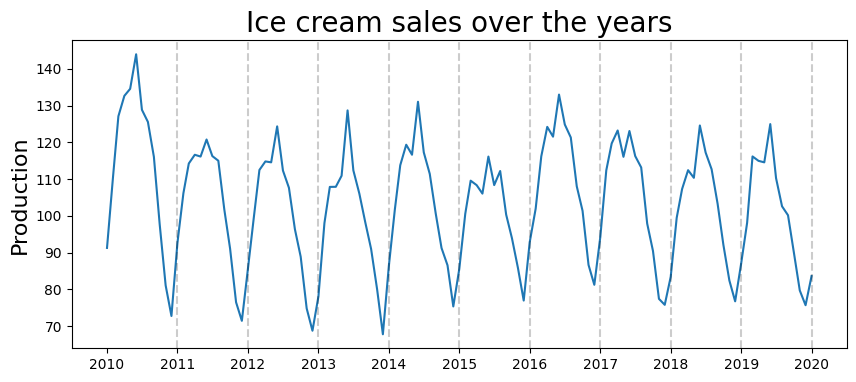

In [131]:
plt.figure(figsize=(10,4))
plt.plot(df_icecream['production'])
plt.title('Ice cream sales over the years', fontsize = 20)
plt.ylabel('Production', fontsize = 16)
for year in range(2011, 2021):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--',alpha=0.2)

## ACF

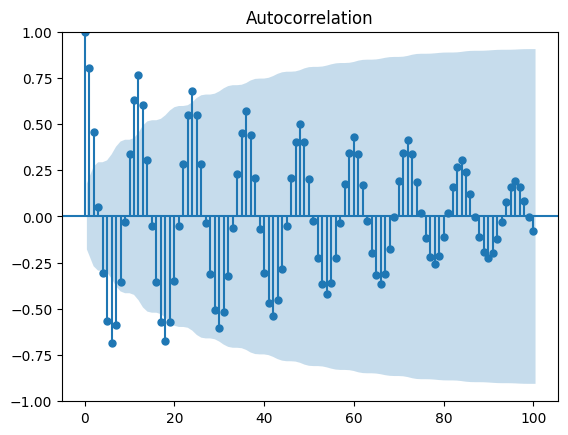

In [132]:
acf_plot = plot_acf(df_icecream['production'], lags = 100)

### Based on decaying ACF, we are likely dealing with Auto Regressive(AR) process

## PACF

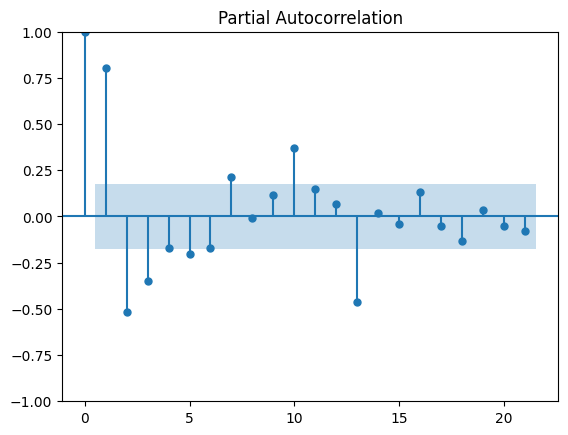

In [133]:
pacf_plot = plot_pacf(df_icecream['production'])

### Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

In [134]:
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
train_end = datetime(2018,12,1)
test_end = datetime(2019,12,1)
train_data = df_icecream[:train_end]
test_data = df_icecream[train_end+timedelta(days=1):test_end]

In [135]:
from time import time
model = ARIMA(train_data, order=(3,0,0))
start=time()
model_fit = model.fit()
end=time()
print('Model fitting time:', end-start)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model fitting time: 2.0851924419403076


In [136]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  108
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -374.085
Date:                Mon, 15 Sep 2025   AIC                            758.170
Time:                        17:58:51   BIC                            771.580
Sample:                    01-01-2010   HQIC                           763.607
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5743      2.169     47.761      0.000      99.324     107.825
ar.L1          1.0469      0.102     10.256      0.000       0.847       1.247
ar.L2         -0.0523      0.175     -0.298      0.7

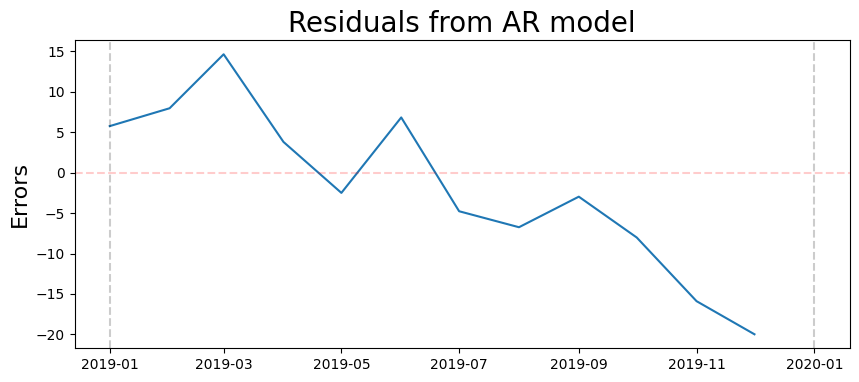

In [137]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['production'] - predictions
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR model', fontsize=20)
plt.ylabel('Errors',fontsize=16)
plt.axhline(0, color='r', linestyle='--',alpha=0.2)
for year in range(2019,2021):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

/tmp/ipython-input-2549932214.py:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Data','Predictions', fontsize=16)


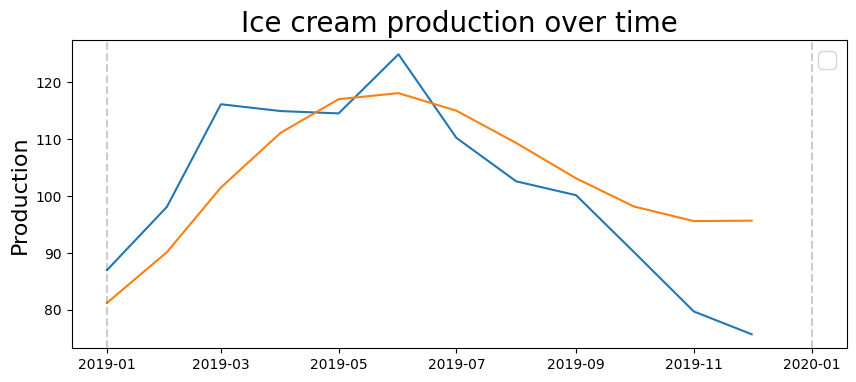

In [138]:
plt.figure(figsize=(10,4))
plt.plot(test_data['production'])
plt.plot(predictions)
plt.legend('Data','Predictions', fontsize=16)
plt.title('Ice cream production over time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2019,2021):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k',linestyle='--',alpha=0.2)

In [139]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data['production'])),4))
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Mean Absolute Percent Error: 0.0895
Root Mean Squared Error: 9.884158745170948


## Forecasting

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model fitting time: 0.44962310791015625
Mean Absolute Percent Error: 0.1211
Root Mean Squared Error: 13.890102333712315


/tmp/ipython-input-366863627.py:30: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Data','Predictions', fontsize=16)


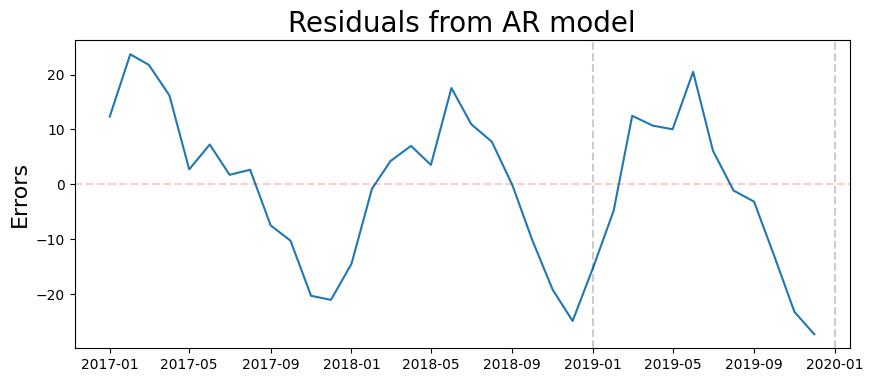

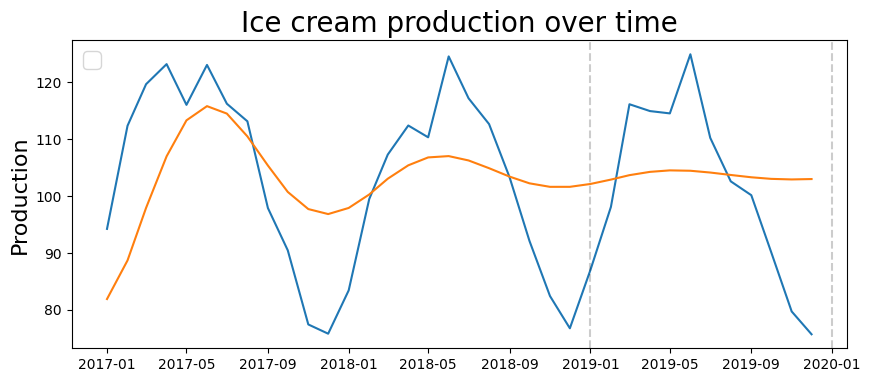

In [140]:
train_end = datetime(2016,12,1) # training data for first 6 years
test_end = datetime(2019,12,1) # test data for next 3 years
train_data = df_icecream[:train_end]
test_data = df_icecream[train_end+timedelta(days=1):test_end]
model = ARIMA(train_data, order=(3,0,0))
start=time()
model_fit = model.fit()
end=time()
print('Model fitting time:', end-start)

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['production'] - predictions


plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR model', fontsize=20)
plt.ylabel('Errors',fontsize=16)
plt.axhline(0, color='r', linestyle='--',alpha=0.2)
for year in range(2019,2021):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)



plt.figure(figsize=(10,4))
plt.plot(test_data['production'])
plt.plot(predictions)
plt.legend('Data','Predictions', fontsize=16)
plt.title('Ice cream production over time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2019,2021):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k',linestyle='--',alpha=0.2)

print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data['production'])),4))
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

### Bad predictions, we need to predict using rolling forecasting origin

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Mean Absolute Percent Error: 0.0582
Root Mean Squared Error: 7.196513632354624


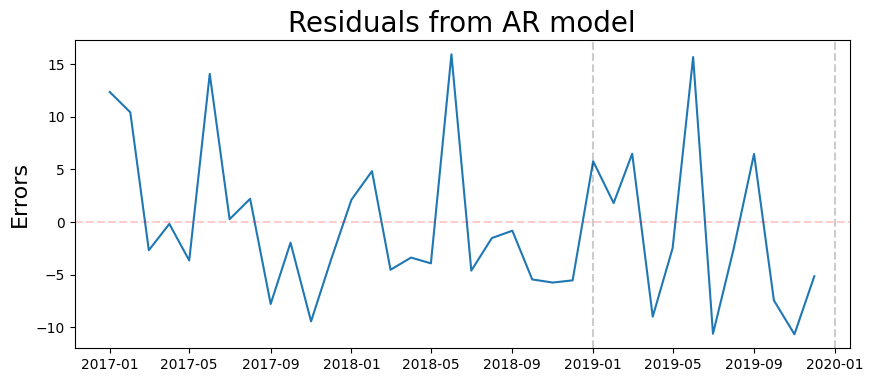

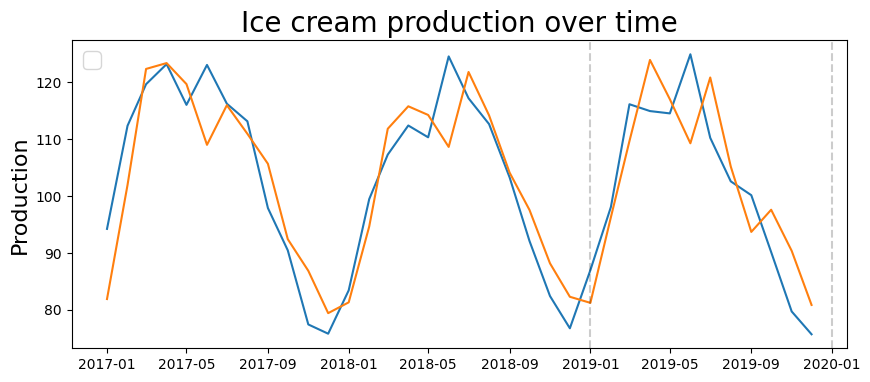

In [141]:
predictions_rolling = pd.Series()
for end_date in test_data.index:
  train_data = df_icecream[:end_date-timedelta(days=1)]
  model_fit = ARIMA(train_data, order=(3,0,0)).fit()
  pred = model_fit.predict(end_date)
  predictions_rolling.loc[end_date] = pred.loc[end_date]
residuals_rolling = test_data['production']-predictions_rolling

plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals from AR model', fontsize=20)
plt.ylabel('Errors',fontsize=16)
plt.axhline(0, color='r', linestyle='--',alpha=0.2)
for year in range(2019,2021):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)



plt.figure(figsize=(10,4))
plt.plot(test_data['production'])
plt.plot(predictions_rolling)
plt.legend('Data','Predictions', fontsize=16)
plt.title('Ice cream production over time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2019,2021):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k',linestyle='--',alpha=0.2)

print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling/test_data['production'])),4))
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals_rolling**2)))

## On Stock Data

In [142]:
import yfinance as yf

In [143]:
ticker_symbol = 'SPY'
ticker_data = yf.Ticker(ticker_symbol)
ticker_df = ticker_data.history(start='2015-01-01', end='2020-01-01')
ticker_df = ticker_df[['Close']]
ticker_df.head()

,Close
Date,
2015-01-02 00:00:00-05:00,171.568039
2015-01-05 00:00:00-05:00,168.469635
2015-01-06 00:00:00-05:00,166.882767
2015-01-07 00:00:00-05:00,168.962311
2015-01-08 00:00:00-05:00,171.960541


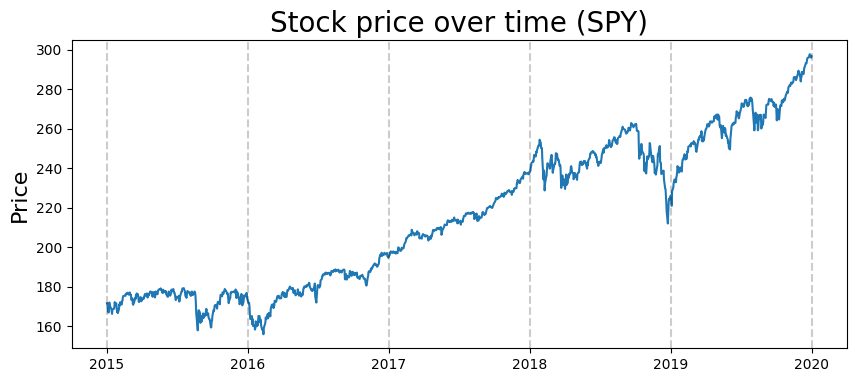

In [144]:
plt.figure(figsize=(10,4))
plt.plot(ticker_df['Close'])
plt.title('Stock price over time (%s)'%ticker_symbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015, 2021):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--',alpha=0.2)

### Stationarity: Take first difference of this series

In [145]:
first_diffs = ticker_df['Close'].values[1:] - ticker_df['Close'].values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])
ticker_df['first_difference'] = first_diffs
ticker_df.head()

,Close,first_difference
Date,,
2015-01-02 00:00:00-05:00,171.568039,-3.098404
2015-01-05 00:00:00-05:00,168.469635,-1.586868
2015-01-06 00:00:00-05:00,166.882767,2.079544
2015-01-07 00:00:00-05:00,168.962311,2.998230
2015-01-08 00:00:00-05:00,171.960541,-1.377991


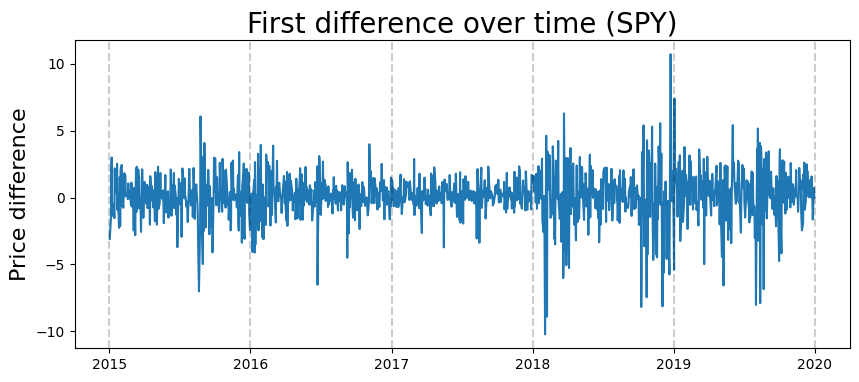

In [146]:
plt.figure(figsize=(10,4))
plt.plot(ticker_df['first_difference'])
plt.title('First difference over time (%s)'%ticker_symbol, fontsize=20)
plt.ylabel('Price difference', fontsize=16)
for year in range(2015, 2021):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--',alpha=0.2)

## ACF

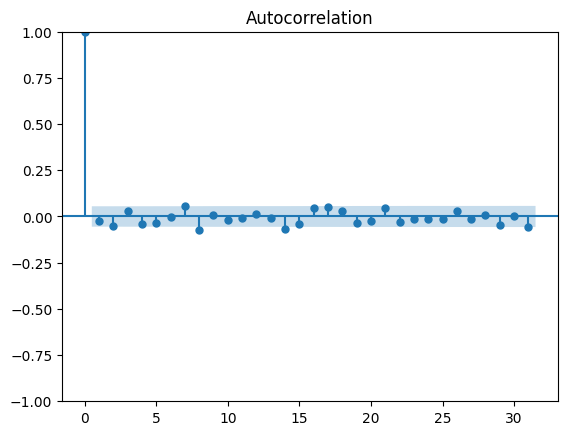

In [147]:
acf_plot = plot_acf(ticker_df.first_difference)

ACF is not that informative

## PACF

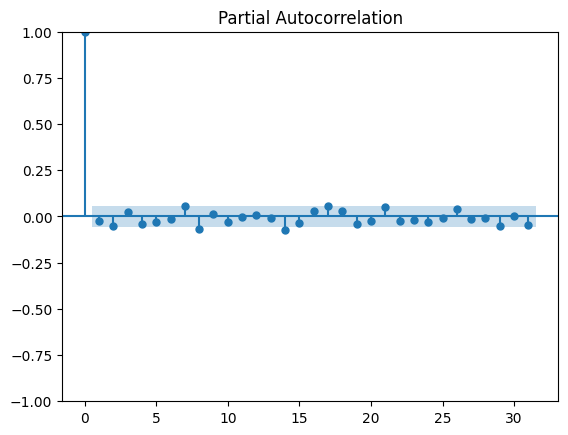

In [148]:
pacf_plot = plot_pacf(ticker_df.first_difference)

### PACF also doesn't tell us much

## Augmented Dickey Fuller Test

In [149]:
from statsmodels.tsa.stattools import adfuller

In [150]:
def generate_ar_process(lags, coefs, length):
  coefs = np.array(coefs)
  series = [np.random.normal() for _ in range(lags)]
  for _ in range(length):
    prev_vals = series[-lags:][::-1]
    new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()
    series.append(new_val)
  return np.array(series)

def perform_adf_test(series):
  result = adfuller(series)
  print('ADF Statistic: %f'%result[0])
  print('p-value: %f'%result[1])

## AR(1) Process

### Stationary

ADF Statistic: -8.252741
p-value: 0.000000


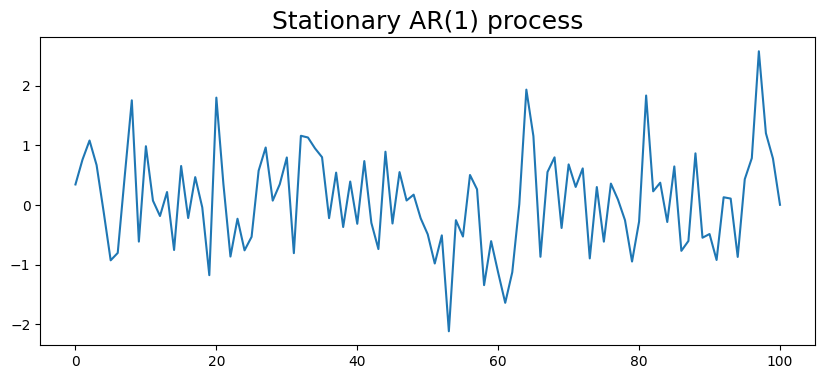

In [151]:
ar1_process = generate_ar_process(1, [.5], 100)
plt.figure(figsize=(10,4))
plt.plot(ar1_process)
plt.title('Stationary AR(1) process', fontsize=18)

perform_adf_test(ar1_process)

### Non Stationary

ADF Statistic: -1.817152
p-value: 0.371980


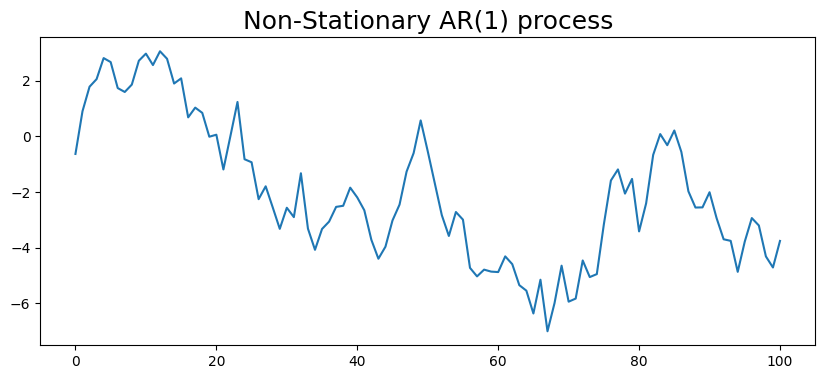

In [152]:
ar1_process_unit_root = generate_ar_process(1, [1], 100)
plt.figure(figsize=(10,4))
plt.plot(ar1_process_unit_root)
plt.title('Non-Stationary AR(1) process', fontsize=18)

perform_adf_test(ar1_process_unit_root)

## AR(2) process

### Stationary

ADF Statistic: -2.423672
p-value: 0.135166


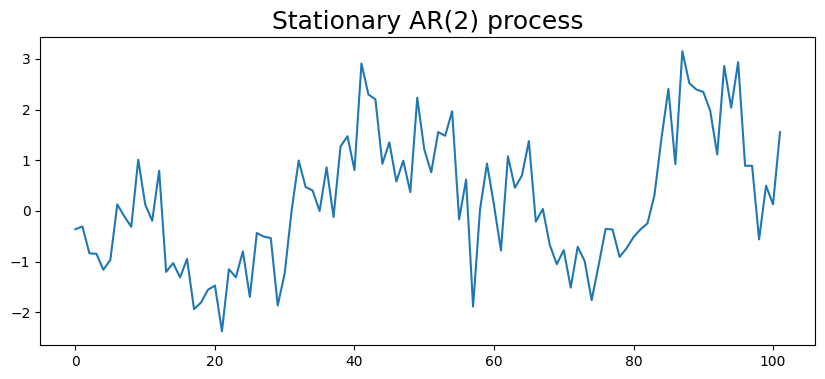

In [153]:
ar2_process = generate_ar_process(2, [.5, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar2_process)
plt.title('Stationary AR(2) process', fontsize=18)

perform_adf_test(ar2_process)

### Non Stationary

ADF Statistic: -1.341315
p-value: 0.610065


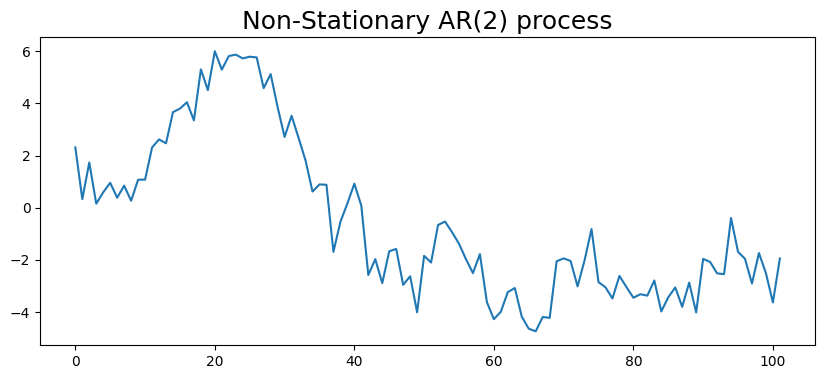

In [154]:
ar2_process_unit_root = generate_ar_process(2, [.7, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar2_process_unit_root)
plt.title('Non-Stationary AR(2) process', fontsize=18)
perform_adf_test(ar2_process_unit_root)